<img src="images/eevee.png" align=right width=30%>
# Pokedex Analysis
Author: Jin Yeom (jinyeom@utexas.edu)

## Contents
- [Filling missing values](#Filling-missing-values)
- [Converting categorical variables to numerical variables](#Converting-categorical-variables-to-numerical-variables)
- [Plotting some interesting statistics](#Plotting-some-interesting-statistics)
- [Pokemon capturing simulation](#Pokemon-capturing-simulation) (planned)
- Vector representation of Pokemon (planned)
- Generating a new Pokemon (planned)
- Generating a new Pokemon with Deep Learning (planned)
- [References](#References)

In [18]:
from ast import literal_eval
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In this notebook, we're going to explore the [Pokedex dataset](https://www.kaggle.com/rounakbanik/pokemon)! I think Pokedex data is a good starting point for studying data science for following reasons:
- it is relatively clean that you don't have to spend too much time cleaning it
- it is large enough to acquire reliable insights about the dataset, but small enough to be managable
- and lastly, it's Pokemon!

*NOTE: there is a typo in the dataset that I fixed for this notebook (classfication -> classification).*

Let's begin by reading the dataset CSV file.

In [2]:
pokedex = pd.read_csv("datasets/pokemon.csv")

In [3]:
pokedex.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [4]:
pokedex.describe(include="all")

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
count,801,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,703.000000,801.000000,801.000000,801.000000,801.000000,801,417,781.000000,801.000000,801.000000
unique,482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18,18,NaN,NaN,NaN
top,['Levitate'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,water,flying,NaN,NaN,NaN
freq,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,114,95,NaN,NaN,NaN
mean,NaN,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,...,55.155761,401.000000,71.305868,70.911361,66.334582,NaN,NaN,61.378105,3.690387,0.087391
std,NaN,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,...,20.261623,231.373075,32.353826,27.942501,28.907662,NaN,NaN,109.354766,1.930420,0.282583
min,NaN,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,...,0.000000,1.000000,10.000000,20.000000,5.000000,NaN,NaN,0.100000,1.000000,0.000000
25%,NaN,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,...,50.000000,201.000000,45.000000,50.000000,45.000000,NaN,NaN,9.000000,2.000000,0.000000
50%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,50.000000,401.000000,65.000000,66.000000,65.000000,NaN,NaN,27.300000,4.000000,0.000000
75%,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,50.000000,601.000000,91.000000,90.000000,85.000000,NaN,NaN,64.800000,5.000000,0.000000


In [5]:
pokedex.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classification', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

## Filling missing values

In this section, we're going to clean up the dataset by filling up missing values. Let's begin by creating a new `DataFrame`.

In [6]:
df = pokedex.copy()

In [7]:
# show columns with missing values and their counts
missing_vals = dict([(c, df[c].isnull().sum()) for c in df.columns[df.isnull().any()]])
for k, v in missing_vals.items():
    print(f"{k}: {v}")

height_m: 20
percentage_male: 98
type2: 384
weight_kg: 20


In [8]:
# show the number of unique values in columns with missing values
unique_vals = dict([(c, df[c].nunique()) for c in df.columns[df.isnull().any()]])
for k, v in unique_vals.items():
    print(f"{k}: {v}")

height_m: 51
percentage_male: 7
type2: 18
weight_kg: 421


In [10]:
# fill missing "percentage_male" with -1
df["percentage_male"].fillna(np.int(-1), inplace=True)
print("percentage_male missing count:", df["percentage_male"].isnull().sum())

percentage_male missing count: 0


In [9]:
# fill missing "type 2" with a string that is not in the unique types
# we're just going to fill these in with "N/A"
print("Type 2: ", df["type2"].unique())
df["type2"].fillna("none", inplace=True)
print("type2 missing count:", df["type2"].isnull().sum())

Type 2:  ['poison' nan 'flying' 'dark' 'electric' 'ice' 'ground' 'fairy' 'grass'
 'fighting' 'psychic' 'steel' 'fire' 'rock' 'water' 'dragon' 'ghost' 'bug'
 'normal']
type2 missing count: 0


In [10]:
# fill missing heights and weights with 0
df["height_m"].fillna(np.int(0), inplace=True)
df["weight_kg"].fillna(np.int(0), inplace=True)
print("height_m missing count:", df["height_m"].isnull().sum())
print("weight_kg missing count:", df["weight_kg"].isnull().sum())

height_m missing count: 0
weight_kg missing count: 0


## Converting categorical variables to numerical variables

In [11]:
# capture_rate seems to contain strings, so we should convert it to integers
# NOTE: also, notice there's only one Pokemon (Minior) with "30 (Meteorite) 255 (Core)", 
# which will be converted into nan. We'll change this to "30".
print("capture_rate (before):", df["capture_rate"].unique())
print(df["name"][df["capture_rate"] == "30 (Meteorite)255 (Core)"])
df["capture_rate"].replace("30 (Meteorite)255 (Core)", "30", inplace=True)

# convert capture rates to numerical values
df["capture_rate"] = pd.to_numeric(df["capture_rate"])
print("capture_rate (after):", df["capture_rate"].unique())

capture_rate (before): ['45' '255' '120' '127' '90' '190' '75' '235' '150' '25' '170' '50' '200'
 '100' '180' '60' '225' '30' '35' '3' '65' '70' '125' '205' '155' '145'
 '130' '140' '15' '220' '160' '80' '55' '30 (Meteorite)255 (Core)']
773    Minior
Name: name, dtype: object
capture_rate (after): [ 45 255 120 127  90 190  75 235 150  25 170  50 200 100 180  60 225  30
  35   3  65  70 125 205 155 145 130 140  15 220 160  80  55]


In [12]:
# this time, we're going to convert types to their unique IDs (0, 1, 2, ...)
# a list of unique types will be used to map each type to its ID, where each
# type's ID is its index in the list.
all_types = list(set(df["type1"]).union(set(df["type2"])))
for idx, type_name in enumerate(all_types):
    print(f"{type_name}: {idx}")

grass: 0
flying: 1
fighting: 2
steel: 3
poison: 4
fire: 5
water: 6
ghost: 7
ice: 8
none: 9
normal: 10
electric: 11
fairy: 12
dark: 13
bug: 14
rock: 15
dragon: 16
ground: 17
psychic: 18


In [13]:
# now, replace each of type1 and type2 with the indices shown above
for idx, type_name in enumerate(all_types):
    df["type1"].replace(type_name, idx, inplace=True)
    df["type2"].replace(type_name, idx, inplace=True)
df[["type1", "type2"]].head()

,type1,type2
0,0,4
1,0,4
2,0,4
3,5,9
4,5,9


In [17]:
# NOTE: abilities are a little more tricky: each entry is consist of an arbitrarily sized
# list of abilities. For now, these lists of abilities can be represented as lists of
# each ability's ID, which can be used for indices in one-hot vector representation. We'll
# discuss more on this later.
abl_tuples = [literal_eval(abls) for abls in pokedex["abilities"].tolist()]
all_abilities = list(set([abl for abls in pokedex["abilities"] for abl in literal_eval(abls)]))
print(all_abilities) # when reduced to a set of unique abilities, there aren't that many

for abls in abl_tuples:
    str_rep = "[%s]" % ", ".join(["'%s'" % abl for abl in abls])
    idx_rep = [all_abilities.index(abl) for abl in abls]
    df["abilities"].replace(str_rep, str(idx_rep), inplace=True)
    
df["abilities"].head()

['Merciless', 'Magic Bounce', 'Rivalry', 'Run Away', 'Insomnia', 'Healer', 'Slow Start', 'Mummy', 'Shell Armor', 'Receiver', 'Beast Boost', 'Light Metal', 'Guts', 'Quick Feet', 'Leaf Guard', 'Rattled', 'Competitive', 'Ice Body', 'Friend Guard', 'Queenly Majesty', 'Forewarn', 'Sheer Force', 'Magician', 'Fairy Aura', 'Sticky Hold', 'Misty Surge', 'Hydration', 'Skill Link', 'Trace', 'Slush Rush', 'Normalize', 'Stall', 'Flower Veil', 'Aftermath', 'Solar Power', 'Teravolt', 'Cheek Pouch', 'Shadow Shield', 'Anger Point', 'Big Pecks', 'Tough Claws', 'Anticipation', 'Water Absorb', 'Heavy Metal', 'Sand Veil', 'Air Lock', 'Pickpocket', 'Liquid Voice', 'Corrosion', 'Clear Body', 'Snow Warning', 'Toxic Boost', 'Klutz', 'Gluttony', 'Chlorophyll', 'Bulletproof', 'RKS System', 'Harvest', 'Aroma Veil', 'Overcoat', 'Pickup', 'Protean', 'Infiltrator', 'Sweet Veil', 'Speed Boost', 'No Guard', 'Prankster', 'Immunity', 'Gooey', 'Gale Wings', 'Shadow Tag', 'Arena Trap', 'Unnerve', 'Power of Alchemy', 'Refr

0    [110, 54]
1    [110, 54]
2    [110, 54]
3    [191, 34]
4    [191, 34]
Name: abilities, dtype: object

## Plotting some interesting statistics

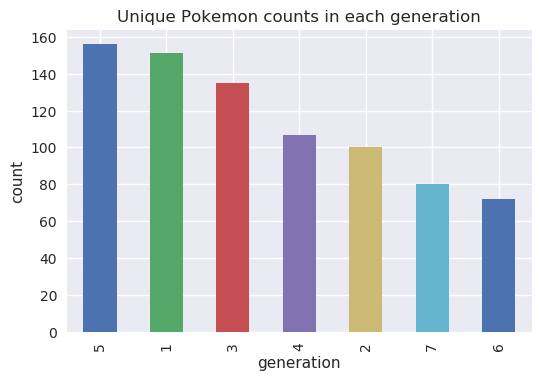

In [19]:
# let's look at how many Pokemons are introduced in each generation
fig1, ax1 = plt.subplots(dpi=100)
ax1.set_title("Unique Pokemon counts in each generation")
ax1.set_xlabel("generation")
ax1.set_ylabel("count")
freq = df["generation"].value_counts()
freq.plot.bar(ax=ax1)
plt.show()

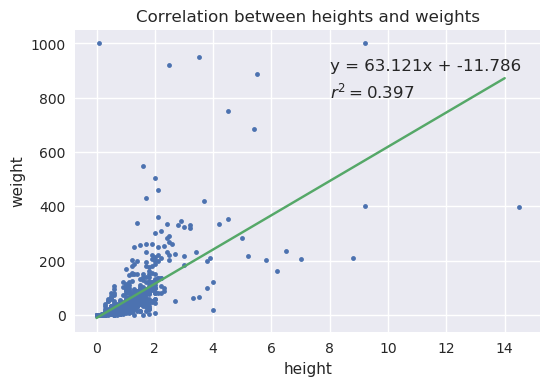

In [20]:
plt.figure(dpi=100)
plt.title("Correlation between heights and weights")
plt.xlabel("height")
plt.ylabel("weight")

heights = df["height_m"]
weights = df["weight_kg"]
plt.plot(heights, weights, ".")

# linear regression
a, b, r, p, stderr = stats.linregress(heights, weights)
x = np.arange(0, 15)
y = a * x + b
plt.plot(x, y, "-")

plt.text(8, 900, r"y = %.3fx + %.3f" % (a, b))
plt.text(8, 800, r"$r^2 = %.3f$" % r ** 2)
plt.grid(True)
plt.show()

## Pokemon capturing simulation

## References

1. https://www.kaggle.com/jeru666/my-pokemon-collection/code
2. https://www.kaggle.com/romaintt/pokemon-create-new-legendary-pokemon/code